/home/paulemeister/Code/Python/Quantum/quantum/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


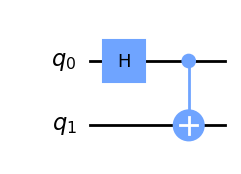

In [1]:
from qiskit import QuantumCircuit
 
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [2]:
from qiskit.quantum_info import Pauli
 
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

In [7]:
#from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.primitives import Estimator
#service = QiskitRuntimeService()
 
# Run on the least-busy backend you have access to
#backend = service.least_busy(simulator=False, operational=True)
 
# Run on a simulator
 
#backend = service.get_backend("ibmq_qasm_simulator")

from quantuminspire.qiskit import QI
from quantuminspire.credentials import enable_account
enable_account('dbed22a87e13ce3d21250d898fb9d73a7990b23b')
QI.set_authentication()
backend = QI.get_backend('QX single-node simulator')

 
# Create an Estimator object
estimator = Estimator()
 
# Submit the circuit to Estimator
job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)
 
# Once the job is complete, get the result
job.result()

EstimatorResult(values=array([ 0.02234504, -0.00374023,  0.00659947, -0.00826615,  1.        ,
        1.        ]), metadata=[{'variance': 0.9999999999999999, 'shots': 5000}, {'variance': 0.9999999999999999, 'shots': 5000}, {'variance': 0.9999999999999999, 'shots': 5000}, {'variance': 0.9999999999999999, 'shots': 5000}, {'variance': 3.3306690738754696e-16, 'shots': 5000}, {'variance': 3.3306690738754696e-16, 'shots': 5000}])

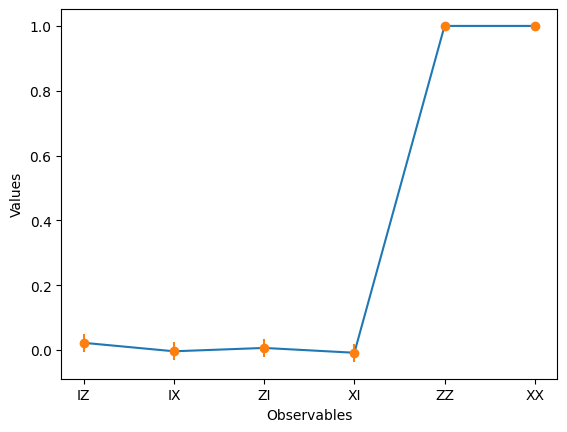

In [8]:
import matplotlib.pyplot as plt
import numpy as np
 
# data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values
 
# creating error bars
error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))
 
# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()